<a href="https://colab.research.google.com/github/irfanizzath/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression**

https://youtu.be/RaqIsTK5qoc?si=t5-iXTW6QA010xIm

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import RcParams
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('/Social_Network_Ads.csv')
pd.set_option('display.max_colwidth', None)
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.drop(columns = ['User ID'], axis = 1, inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df.Gender = le.fit_transform(df.Gender)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


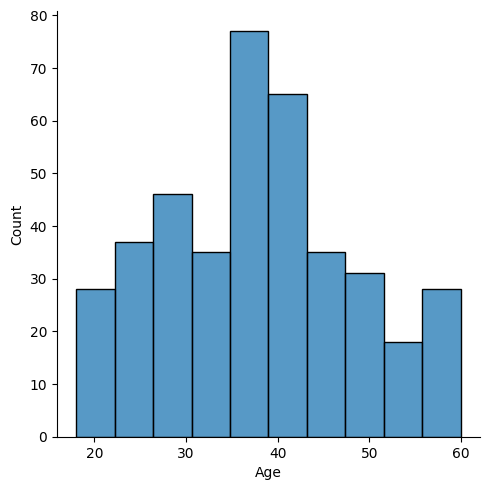

In [10]:
sns.displot(df.Age)
pl.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.4900,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


<Axes: >

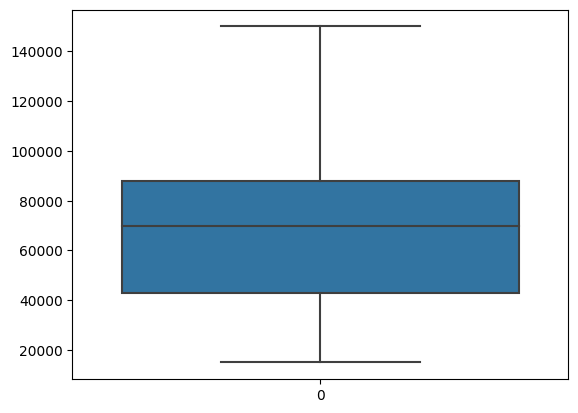

In [12]:
sns.boxplot(df.EstimatedSalary)

<Axes: >

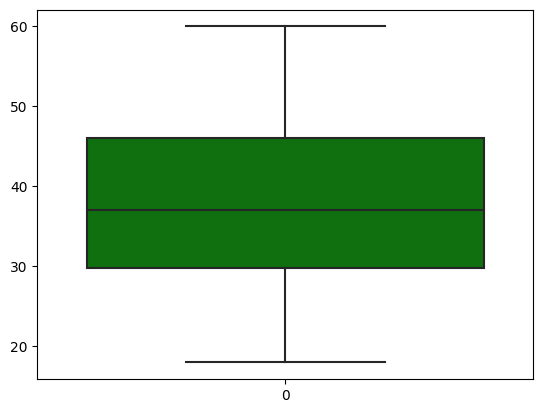

In [13]:
sns.boxplot(df.Age, color = 'green')

<Axes: >

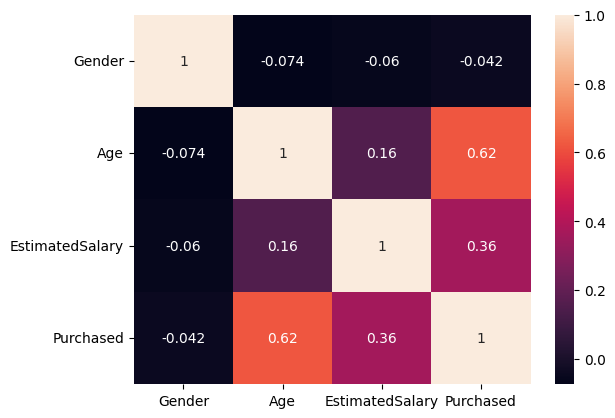

In [14]:
sns.heatmap(df.corr(), annot = True)

In [15]:
df.corr().Purchased.sort_values(ascending = False)

Purchased          1.000000
Age                0.622454
EstimatedSalary    0.362083
Gender            -0.042469
Name: Purchased, dtype: float64

**X and Y Split**

In [16]:
Y = df['Purchased']
X = df.drop(columns = ['Purchased'], axis = 1 )

### **Scaling**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

**Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 0)

In [19]:
X_train.shape

(320, 3)

In [20]:
X_test.shape

(80, 3)

### **Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(X_train,Y_train)

LogisticRegression()

In [23]:
pred = model.predict(X_test)

In [24]:
pd.DataFrame({'Actual Value':Y_test, 'Predicted Value':pred})

,Actual Value,Predicted Value
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
14,0,0
363,0,0
304,0,0
361,1,1


**Model Evaluation**

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print('Accuracy score : ',end='')
accuracy_score(Y_test, pred)

Accuracy score : 

0.925

In [29]:
print(confusion_matrix(Y_test, pred))

[[58  0]
 [ 6 16]]


In [31]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

In [47]:
probability = model.predict_proba(X_test)[:,1]
fpr,tpr,threshholds = roc_curve(Y_test, probability)

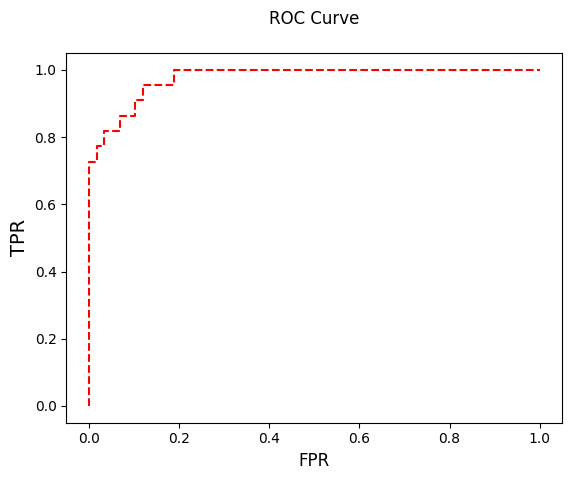

ROC_AUC_Score =  0.975705329153605


In [72]:
pl.plot(fpr,tpr,color = 'r', linestyle='dashed')
pl.xlabel('FPR',size = 12)
pl.ylabel('TPR',size = 14)
pl.title('ROC Curve\n')
pl.show()


print("\033[1m" + 'ROC_AUC_Score = ' + "\033[0m" , roc_auc_score(Y_test, probability))